The goal of `punk` is to make available sime wrappers for a variety of machine learning pipelines.

The pipelines are termed `primitves` and each primitive is designed with a functional programming approach in mind.

At the time of this writing, `punk` is being periodically updated. Any new primitives will be realesed as a pip-installable python package every friday along with their corresponding annotations files for the broader D3M community.

Here we will briefly show how the primitives in the punk package can be utilized.

In [1]:
import punk
help(punk)

Help on package punk:

NAME
    punk

PACKAGE CONTENTS
    base
    feature_selection (package)
    novelty_detection (package)

DATA
    __all__ = ['feature_selection', 'novelty_detection']

VERSION
    1.0.0

FILE
    /home/alarcj/Documents/datasci/NewKnowledge/primitives_repo/CODE/examples/punk/__init__.py




In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler                                
from sklearn.model_selection import train_test_split

from punk import feature_selection

# Feature Selection

## Feature Selection for Classification Problems

The `rfclassifier_feature_selection` primitive takes in a dataset (training data along with labels) to output a ranking of features as shown below:

In [4]:
# Wine dataset
df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                      'python-machine-learning-book/master/code/datasets/wine/wine.data', 
                      header=None)    
columns = np.array(['Alcohol', 'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium', 'Total phenols',
                    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                    'Proline'])
# Split dataset 
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values            
X, _, y, _ = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
%%time

# Run primitive
rfc = feature_selection.RFFeatures(problem_type="classification", 
                                   cv=3, scoring="accuracy", verbose=0, n_jobs=1)
rfc.fit(("matrix", "matrix"), (X, y))

CPU times: user 38.5 s, sys: 80 ms, total: 38.6 s
Wall time: 38.7 s


 1)        Color intensity         0.17600
 2)            Proline             0.16426
 3)           Flavanoids           0.14943
 4)  OD280/OD315 of diluted wines  0.14081
 5)            Alcohol             0.10759
 6)              Hue               0.07522
 7)         Total phenols          0.05475
 8)       Alcalinity of ash        0.03159
 9)           Malic acid           0.02552
10)        Proanthocyanins         0.02376
11)           Magnesium            0.02217
12)      Nonflavanoid phenols      0.01659
13)              Ash               0.01231


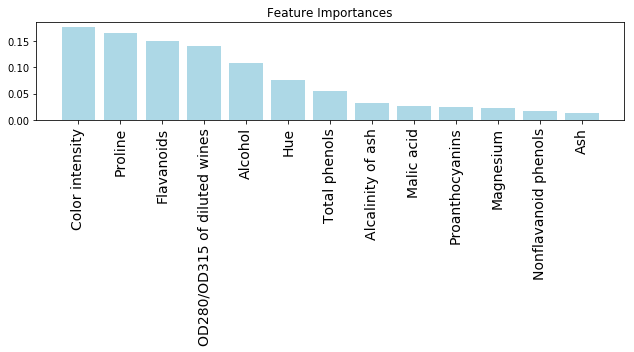

In [6]:
feature_importances = rfc.feature_importances
feature_indices = rfc.indices

for i in range(len(columns)):
    print("{:>2}) {:^30} {:.5f}".format(i+1, 
                                        columns[feature_indices[i]],
                                        feature_importances[feature_indices[i]]
                                       ))
    
plt.figure(figsize=(9, 5))
plt.title('Feature Importances')
plt.bar(range(len(columns)), feature_importances[feature_indices], color='lightblue', align='center')

plt.xticks(range(len(columns)), columns[feature_indices], rotation=90, fontsize=14)
plt.xlim([-1, len(columns)])
plt.tight_layout()
plt.savefig('./random_forest.png', dpi=300)
plt.show()

## Feature Selection for Regression Problems

Similarly, `rfregressor_feature_selection` can be used for regression type problems:

In [7]:
# Get boston dataset
boston = datasets.load_boston()
X, y = boston.data, boston.target

In [11]:
%%time

# Run primitive
rfr = feature_selection.RFFeatures(problem_type="regression", 
                                   cv=3, scoring="r2", verbose=0, n_jobs=1)
rfr.fit(("matrix", "matrix"), (X, y))

CPU times: user 1min 40s, sys: 28 ms, total: 1min 40s
Wall time: 1min 40s


 1)       RM        0.43219
 2)      LSTAT      0.37294
 3)       DIS       0.06685
 4)      CRIM       0.03685
 5)       NOX       0.02356
 6)     PTRATIO     0.01672
 7)       TAX       0.01437
 8)       AGE       0.01310
 9)        B        0.01174
10)      INDUS      0.00596
11)       RAD       0.00383
12)       ZN        0.00102
13)      CHAS       0.00087


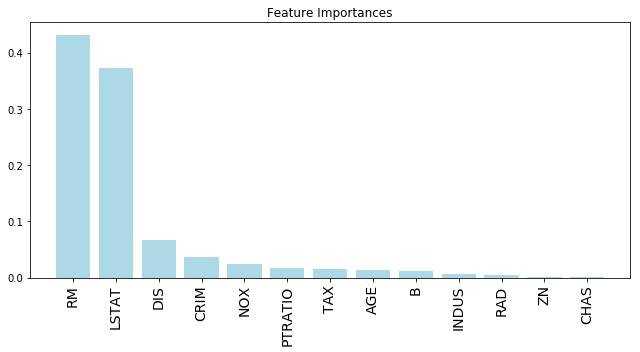

In [14]:
feature_importances = rfr.feature_importances
feature_indices = rfr.indices

columns = boston.feature_names
for i in range(len(columns)):
    print("{:>2}) {:^15} {:.5f}".format(i+1, 
                                        columns[feature_indices[i]],
                                        feature_importances[feature_indices[i]]
                                       ))
    
plt.figure(figsize=(9, 5))
plt.title('Feature Importances')
plt.bar(range(len(columns)), feature_importances[feature_indices], color='lightblue', align='center')

plt.xticks(range(len(columns)), columns[feature_indices], rotation=90, fontsize=14)
plt.xlim([-1, len(columns)])
plt.tight_layout()
plt.savefig('./random_forest.png', dpi=300)
plt.show()

To provide some context, below we show the correlation coefficients between some of the features in the boston dataset.

Notice how the two features that were ranked the most important by our primitve are also the two features with the highest correlation coefficient (in absolute value) with the dependent variable `MEDV`.

This figure was taken from [python machine learning book](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch10/ch10.ipynb).

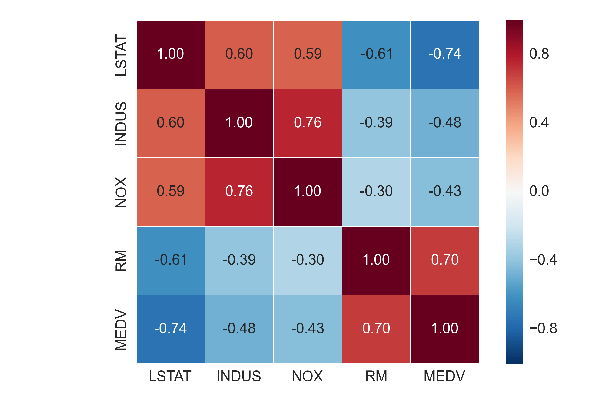

In [15]:
import matplotlib.image as mpimg

img=mpimg.imread("heatmap.png")
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(img);

## Ranking Features by their Contributions to Principal 

`pca_feature_selection` does a feature ranking based on the contributions each feature has to each of the principal components and by their contributions to the first principal component.

In [4]:
# Get iris dataset
iris = datasets.load_iris()
sc = StandardScaler()
X = sc.fit_transform(iris.data)

In [5]:
# run primitive
iris_ranking = feature_selection.PCAFeatures()
iris_ranking.fit(["matrix"], X)

In [19]:
feature_names = np.array(iris.feature_names)

print(feature_names, '\n')
for i in range(iris_ranking.importance_onallpcs.shape[0]):
    print("{:>2}) {:^19}".format(i+1, feature_names[iris_ranking.importance_onallpcs[i]]))

['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)'] 

 1)  petal length (cm) 
 2)  sepal width (cm)  
 3)  sepal length (cm) 
 4)  petal length (cm) 


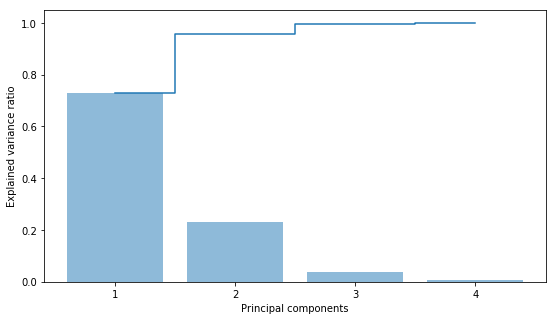

In [23]:
plt.figure(figsize=(9, 5))
plt.bar(range(1, 5), iris_ranking.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 5), np.cumsum(iris_ranking.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks([1, 2, 3, 4])
plt.show()